# Libraries

In [1]:
import numpy as np
np.random.seed(0)
import tensorflow as tf
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

%matplotlib inline
%config InlineBackend.figure_format = 'png'

# Import DataSet

[[ 2.04271531  0.51812416]
 [ 1.72033708 -0.13233804]
 [-0.26386729  0.76382643]
 ..., 
 [ 0.33823662 -0.43099924]
 [ 0.1269428   0.09966251]
 [ 0.54241537 -0.47450809]]


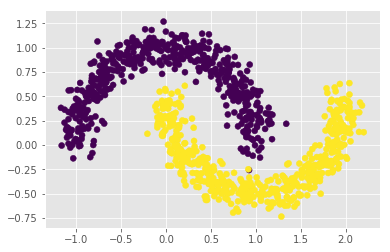

In [57]:
data, labels = sklearn.datasets.make_moons(n_samples=1000, shuffle=True, noise=0.1, random_state=0)
plt.figure()
plt.scatter(data[:,0], data[:,1], c=labels)


# Split Dataset into training and testing

In [26]:
from sklearn.utils import shuffle

X, y = shuffle(data, labels)

X_training = np.array(X[0:600,])
X_testing  = np.array(X[600:,])
y1_training = y[0:600]
y1_testing  = y[600:]

print('X_training: ', X_training.shape)
print('X_testing', X_testing.shape)

n_labels = 2
y_label = np.eye(2)
y_training = []
y_testing  = []

for i in range(600):
    if y1_training[i] == 0:
        y_training.append(y_label[0])
    else:
        y_training.append(y_label[1])
    
for i in range(400):
    if y1_testing[i] == 0:
        y_testing.append(y_label[0])
    else:
        y_testing.append(y_label[1])
        
y_training = np.array(y_training)
y_testing  = np.array(y_testing)

X_training:  (600, 2)
X_testing (400, 2)


# Neural Nework Model

In [108]:
learning_rate = 0.01
training_epochs = 30
batch_size = 100
display_step = 100

n_features1 = 2
n_features2 = 2

n_labels = 2

X = tf.placeholder(tf.float32, [None, n_features1]) # Input x1, x2
Y = tf.placeholder(tf.float32, [None, n_labels]) # Output labels

W1 = tf.Variable(tf.truncated_normal([n_features1, n_features2]), name='weights1') # w1, w2
b1 = tf.Variable(tf.constant(value=1, dtype=tf.float32, shape=[n_features2]), name='bias1')   # bias
W2 = tf.Variable(tf.truncated_normal([n_features2, n_labels]), name='weights2') # w1, w2
b2 = tf.Variable(tf.constant(value=1, dtype=tf.float32, shape=[n_labels]), name='bias2')   # bias

hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W1), b1))
Y_       = tf.nn.softmax(tf.matmul(hidden_1, W2) + b2)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y, logits=Y_))
train_step = tf.train.AdamOptimizer(learning_rate).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(Y_, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Train Neural Network Model

In [109]:
batches = []
epochs = []
overall_batch_loss = []
overall_epoch_loss = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        overall_loss = 0.
        for i in range(0, len(X_training), batch_size):
            batch_xs = X_training[i : (i + batch_size)]
            batch_ys = y_training[i : (i + batch_size)]
            
            _, batch_loss = sess.run([train_step, cross_entropy], feed_dict={X: batch_xs, Y: batch_ys})
            
            overall_loss += batch_loss/batch_size
            
            batches.append(i)            
            overall_batch_loss.append(batch_loss/batch_size)
    
            #print('Batch %d, Loss: %g' % (i, batch_loss))
        
        epochs.append(epoch)
        epoch_loss = sess.run([cross_entropy], feed_dict={X: X_testing, Y: y_testing})
        print("Epoch:", '%04d' % (epoch+1), "Loss=%f" % (epoch_loss[0]))
        overall_epoch_loss.append(epoch_loss)
        

    a = sess.run([accuracy], feed_dict={X: X_testing, Y: y_testing})
    #train_accuracy_all.append(a)
    print("Accuracy:", a)   

Epoch: 0001 Loss=0.837710
Epoch: 0002 Loss=0.830473
Epoch: 0003 Loss=0.822966
Epoch: 0004 Loss=0.811233
Epoch: 0005 Loss=0.789596
Epoch: 0006 Loss=0.752913
Epoch: 0007 Loss=0.701739
Epoch: 0008 Loss=0.644698
Epoch: 0009 Loss=0.593885
Epoch: 0010 Loss=0.556065
Epoch: 0011 Loss=0.530042
Epoch: 0012 Loss=0.512435
Epoch: 0013 Loss=0.500562
Epoch: 0014 Loss=0.491987
Epoch: 0015 Loss=0.485064
Epoch: 0016 Loss=0.479255
Epoch: 0017 Loss=0.474314
Epoch: 0018 Loss=0.470195
Epoch: 0019 Loss=0.466694
Epoch: 0020 Loss=0.463708
Epoch: 0021 Loss=0.461145
Epoch: 0022 Loss=0.458909
Epoch: 0023 Loss=0.456939
Epoch: 0024 Loss=0.455170
Epoch: 0025 Loss=0.453568
Epoch: 0026 Loss=0.452096
Epoch: 0027 Loss=0.450746
Epoch: 0028 Loss=0.449526
Epoch: 0029 Loss=0.448431
Epoch: 0030 Loss=0.447448
Accuracy: [0.8725]


# Epoch Loss Plotting

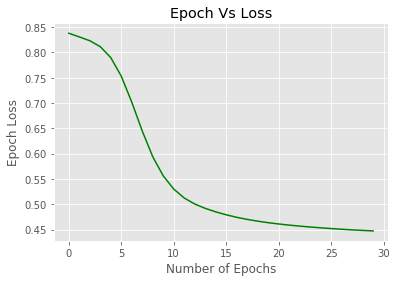

In [110]:
plt.style.use('ggplot')
batches = np.array(batches)
batches = np.squeeze(batches)

overall_batch_loss = np.array(overall_batch_loss)
overall_batch_loss = np.squeeze(overall_batch_loss)

overall_epoch_loss = np.array(overall_epoch_loss)

x2, = plt.plot(range(training_epochs), overall_epoch_loss, "g-", label="Epoch Loss") 
plt.title('Epoch Vs Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Epoch Loss')

# Batch loss Plotting

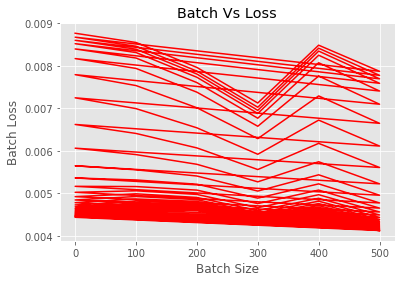

In [111]:
x2, = plt.plot(batches, overall_batch_loss, "r-", label="Batch Loss") 

plt.title('Batch Vs Loss')
plt.xlabel('Batch Size')
plt.ylabel('Batch Loss')


# ROC Curve

In [112]:

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
#n_samples, n_features = X.shape
#X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
 #                                                   random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=random_state))
y_score = classifier.fit(X_testing, y_testing).decision_function(X_testing)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_testing[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_testing.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# ROC Plot single class

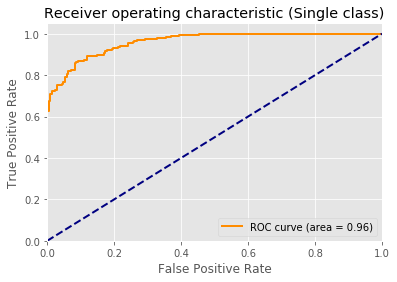

In [113]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (Single class)')
plt.legend(loc="lower right")
plt.show()

# ROC Multiple Class

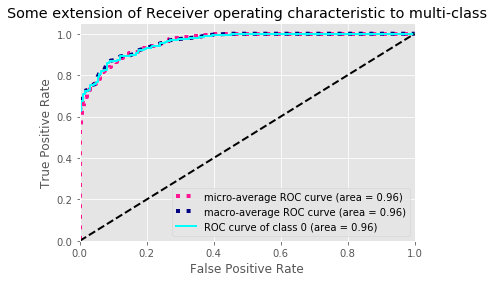

In [114]:
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()